# Trabalho de Implementação 1

**<font color='red'>Discipline: CMP197 - Introdução à Visão Computacional</font>**

Professor: 

- Cláudio Jung

Authors:
- Lucas Nedel Kirsten, 230262
- Diego Severo Jardim, 319862

## Importing the necessary libraries

In [1]:
import cvwt
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Question 1

**Define iterations, input signal and the filter type**

In [2]:
J = 2

x = np.array([1, 2, -1, 3, 6, -2, -1, 3])

wavelet = 'haar'

**Going forward in the wavelet transform**

In [3]:
print('Wavelet:')
cA, cD = cvwt.dwt(x=x, J=J, wavelet=wavelet)

print(f'A{J}: ', cA)
for j, dj in enumerate(cD):
    print(f'D{j+1}: ', dj)

Wavelet:
A2:  [2.5 3. ]
D1:  [-0.70710678 -2.82842712  5.65685425 -2.82842712]
D2:  [0.5 1. ]


**Returning to the original signal**

In [4]:
print('\nInverse Wavelet:')
cA = cvwt.idwt(cA, cD)
print(f'Inverse(A{J-j}): ', cA)


Inverse Wavelet:
Inverse(A1):  [ 1.  2. -1.  3.  6. -2. -1.  3.]


## Question 2

**Define the input image, number of iterations and the filter type**

In [5]:
x = cv2.imread('cvwt/barbara.jpg', cv2.IMREAD_GRAYSCALE)

J = 2

wavelet = 'haar'

<ipython-input-6-156adf2c61b2>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  cA, cD = cvwt.dwt2(x, J=J, wavelet=wavelet)


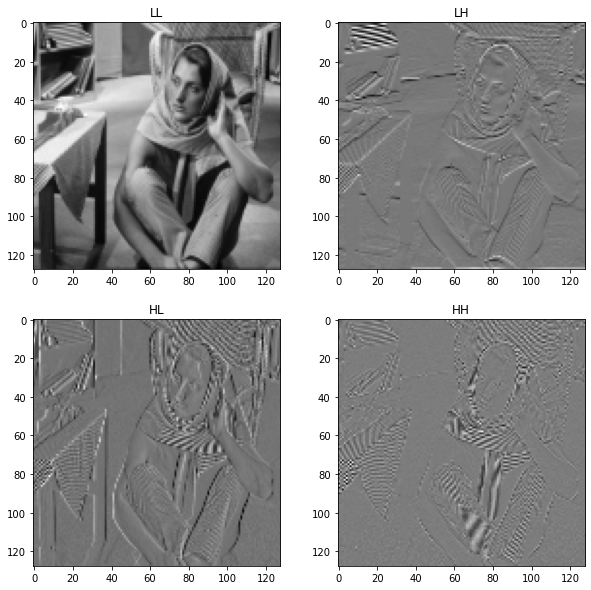

In [6]:
cA, cD = cvwt.dwt2(x, J=J, wavelet=wavelet)
cvwt.plot_dwt2(cA, cD[-1], cmap='gray')

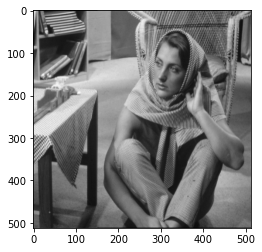

In [7]:
inv = cvwt.idwt2(cA, cD, wavelet=wavelet)
plt.imshow(inv, cmap='gray')

## Question 3

**Define the input image, number of iterations, filter type and noise and soft-threshold parameters**

In [15]:
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

Js = [1, 2, 3]

wavelet = 'haar'

mean = 0
var = 200

ts = np.linspace(0, 255, num=5, dtype='int')

print(ts)

[  0  63 127 191 255]


**Add noise to the image and make a comparison between both original and noisy images**

Text(0.5, 1.0, 'Noisy Image')

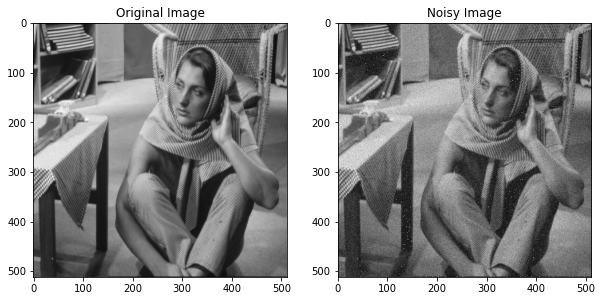

In [9]:
sigma = np.sqrt(var)
noise = x.astype('float32') + np.random.normal(mean,sigma, x.shape)
noise = np.uint8(noise)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(x, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(noise, cmap='gray')
axs[1].set_title('Noisy Image')

**Apply the soft-thresholding on the wavelet coefficients and plot the results**

<ipython-input-10-5e6b1852e076>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  smooth = cvwt.apply_soft_thresholding(noise, J=J, t=t)


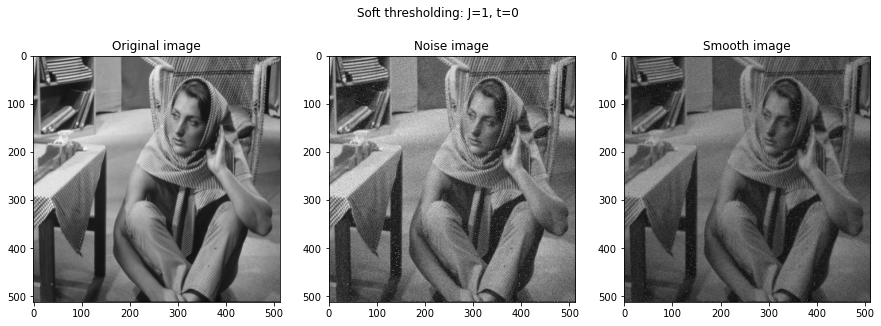

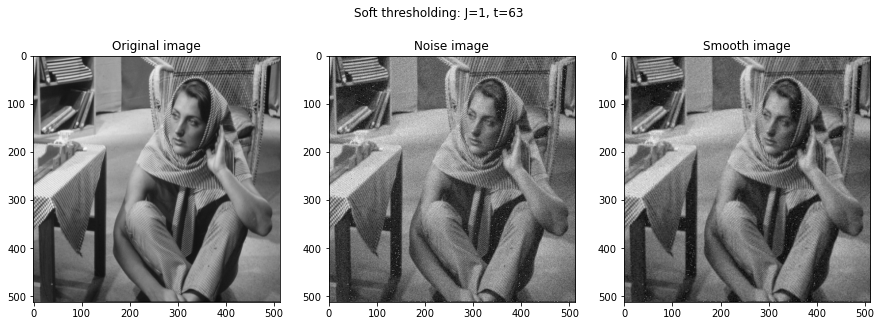

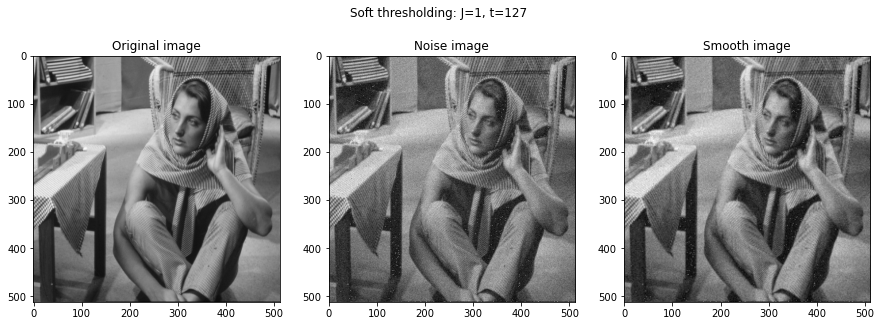

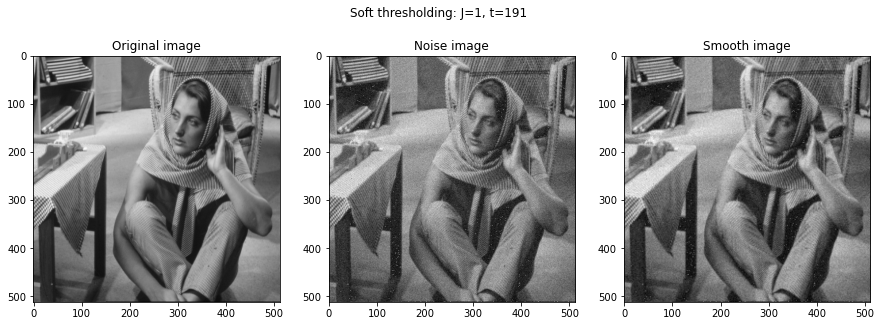

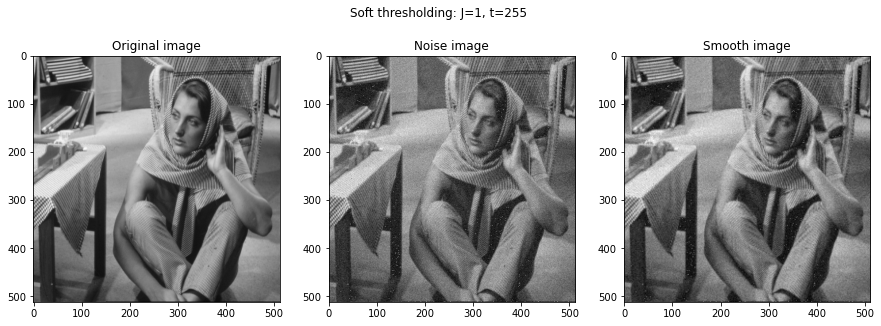

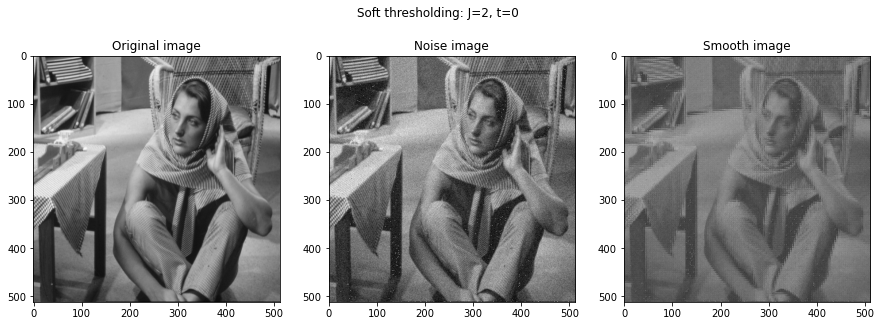

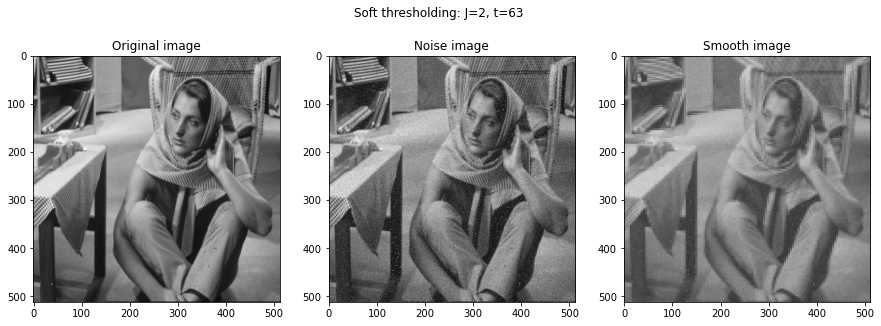

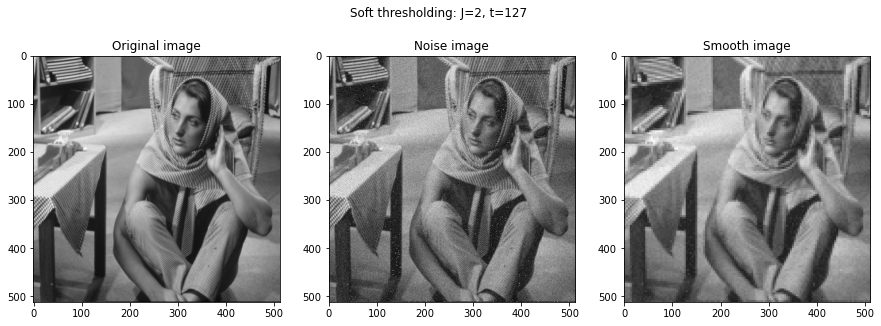

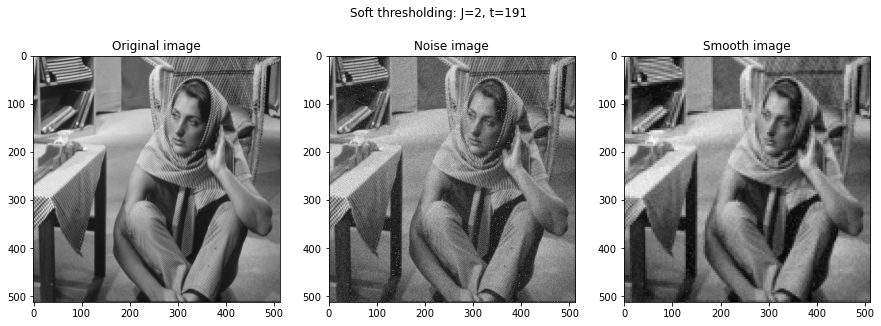

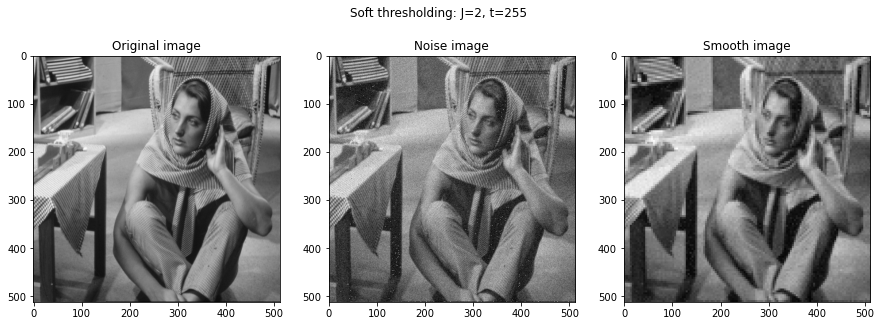

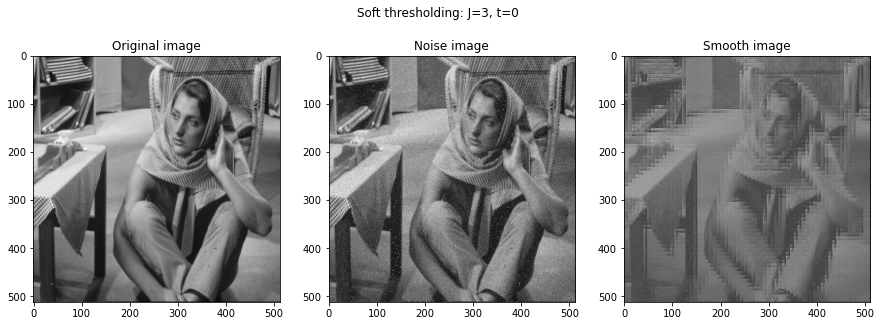

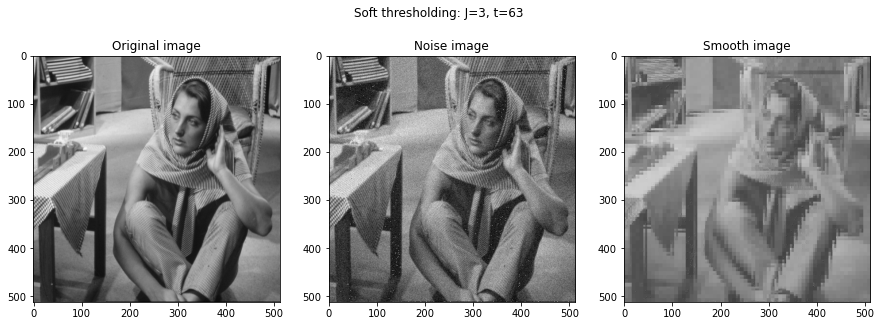

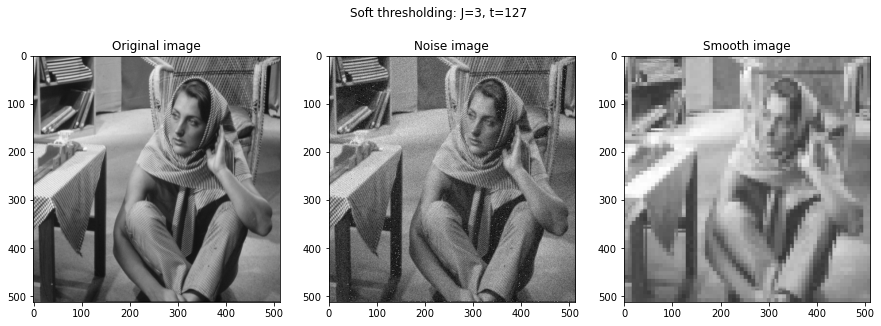

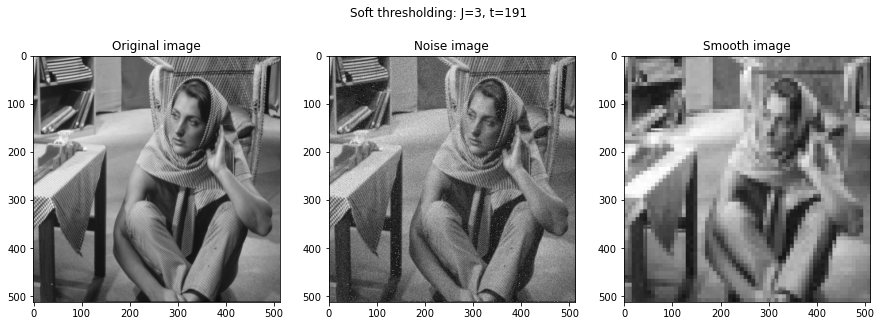

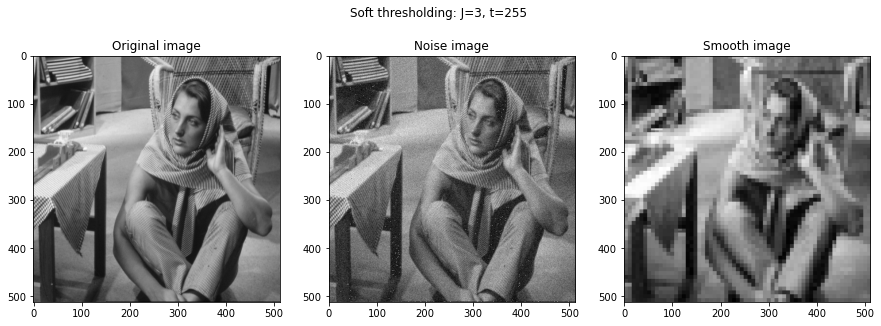

In [10]:
for J in Js:
    for t in ts:
        smooth = cvwt.apply_soft_thresholding(noise, J=J, t=t)
        
        fig, axs = plt.subplots(1,3, figsize=(15,5))
        fig.suptitle(f'Soft thresholding: J={J}, t={t}')
        axs[0].imshow(x, cmap='gray')
        axs[0].set_title('Original image')

        axs[1].imshow(noise, cmap='gray')
        axs[1].set_title('Noise image')

        axs[2].imshow(smooth, cmap='gray')
        axs[2].set_title('Smooth image')

## Question 4

TODO: use 3 channels instead of only 1 (make operations per channel)

**Define the input image, number of iterations and the parameters for compaction**

In [11]:
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

Js = [1, 2, 3]

alphas = [0.1, 0.4, 0.5, 0.7, 0.8, 0.9]

**Compact the image and compare the reconstructed image to the original one**

<ipython-input-12-bef97a344fc4>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  (cA, Dj, reconstructed) = cvwt.compact_image(x, J=J, alpha=alpha)
<ipython-input-12-bef97a344fc4>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  (cA, Dj, reconstructed) = cvwt.compact_image(x, J=J, alpha=alpha)


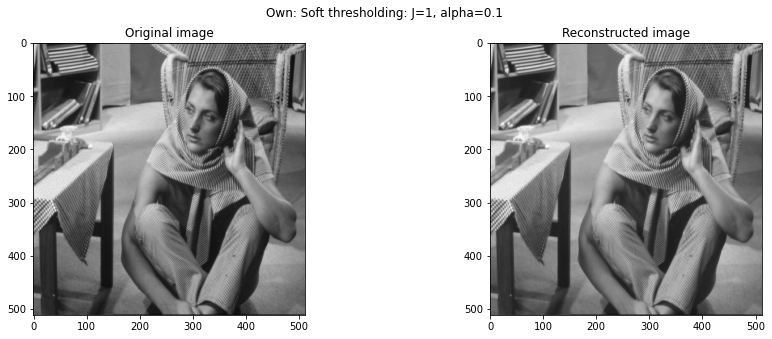

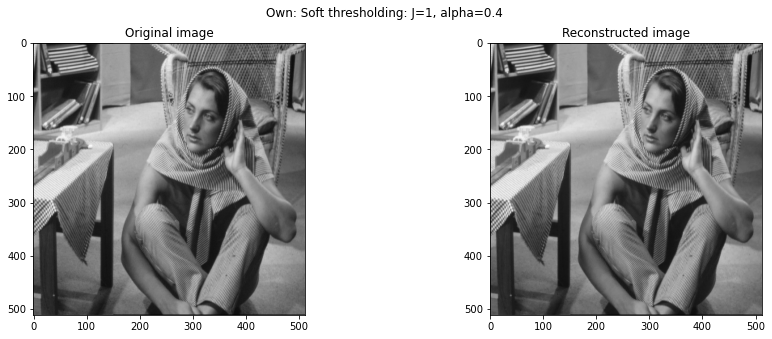

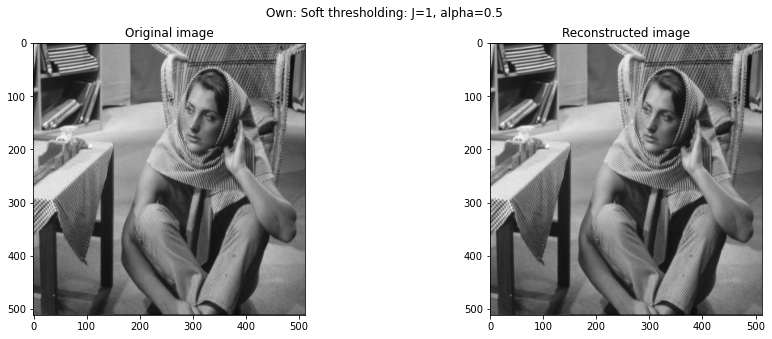

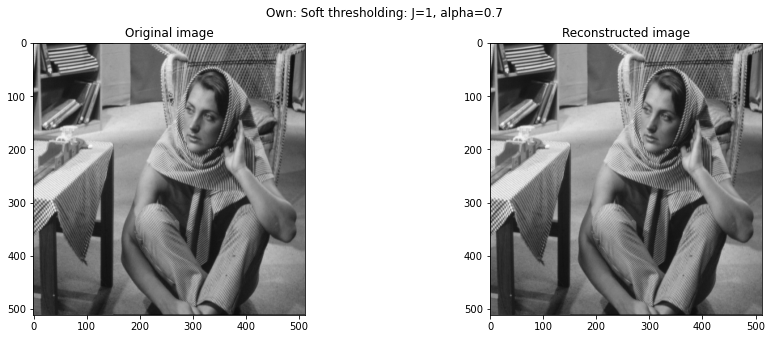

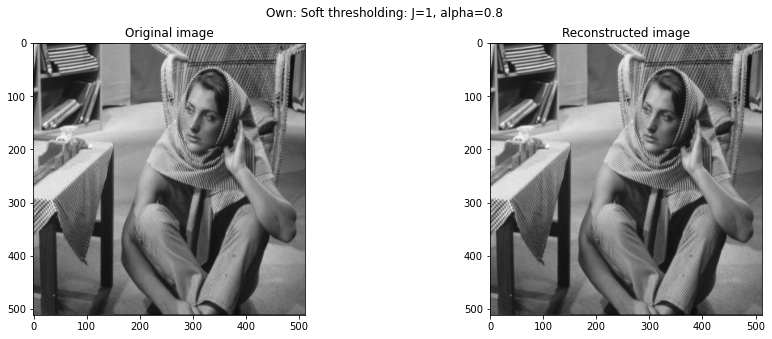

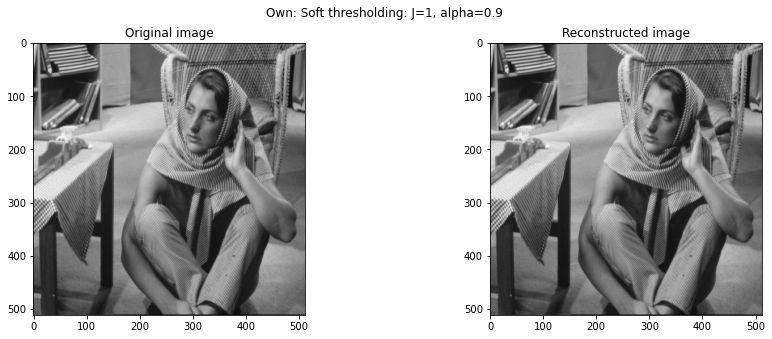

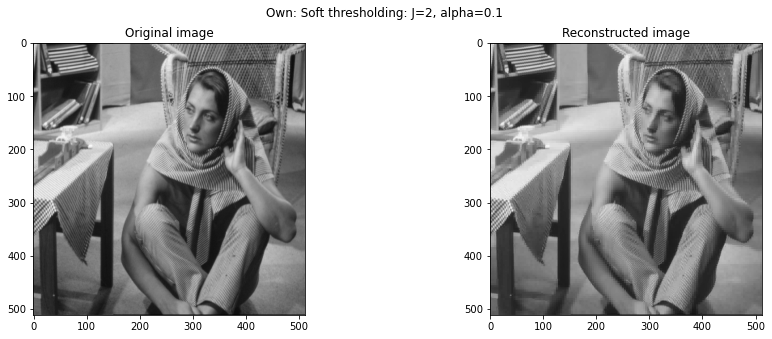

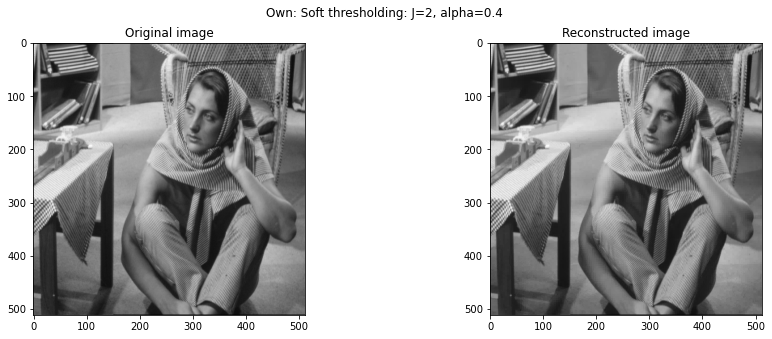

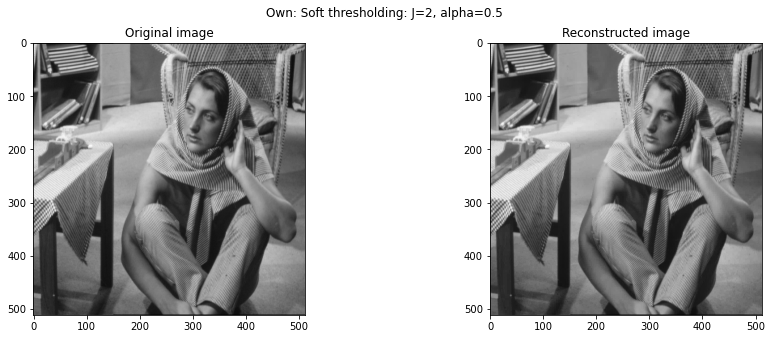

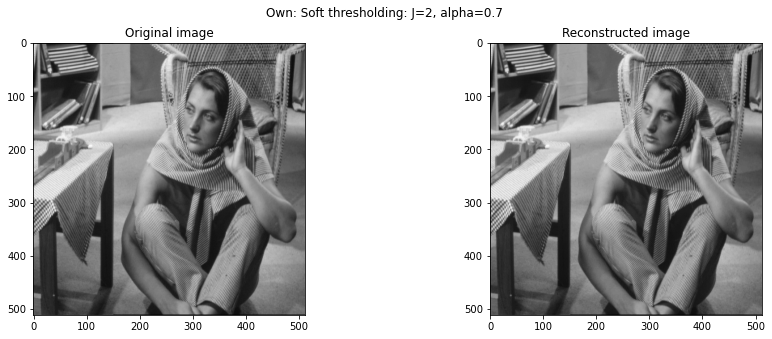

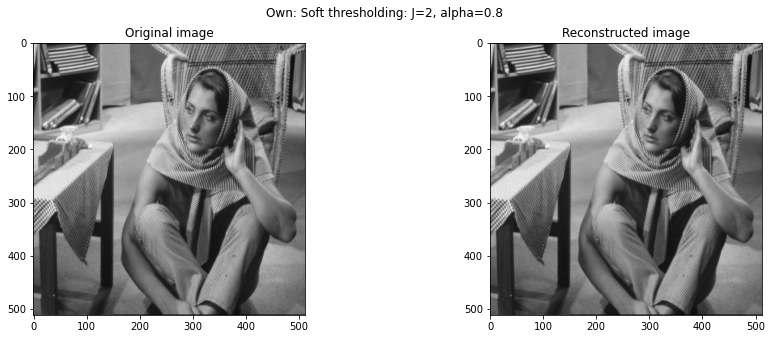

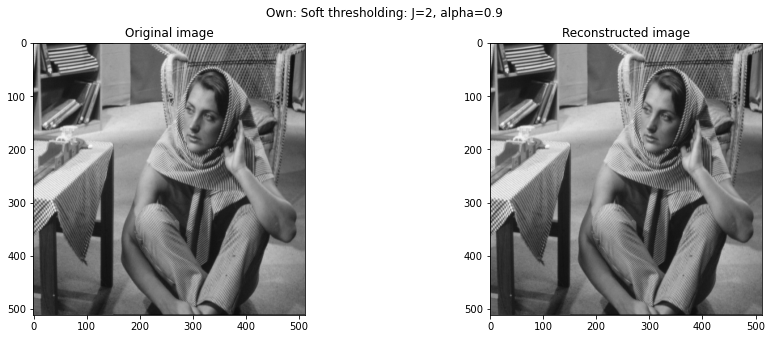

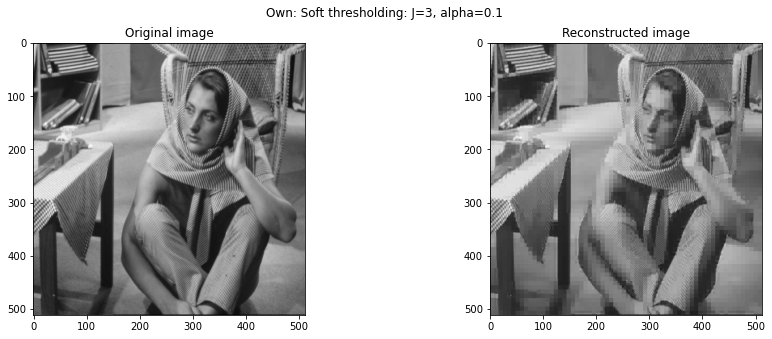

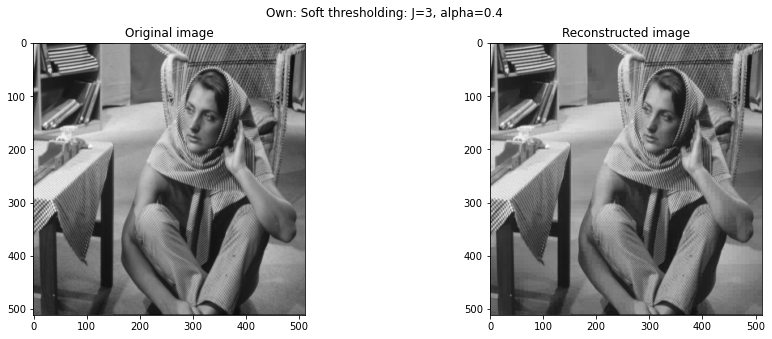

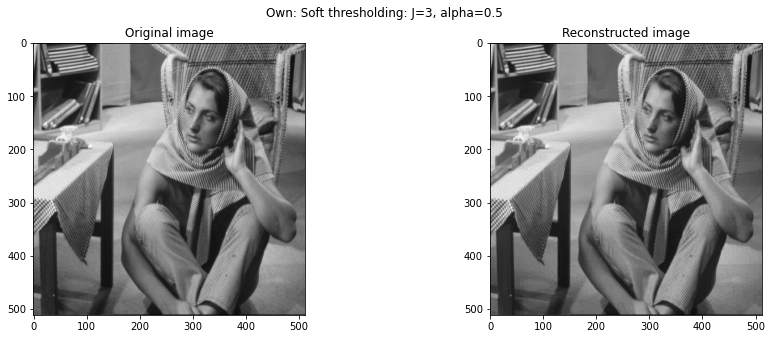

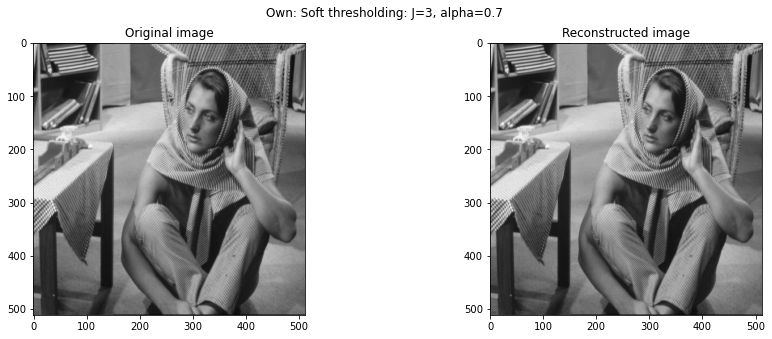

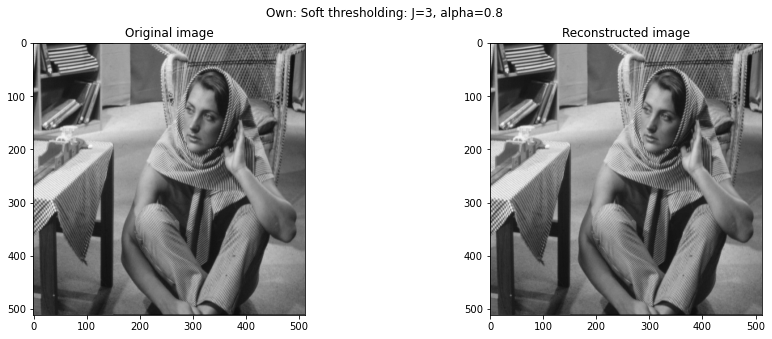

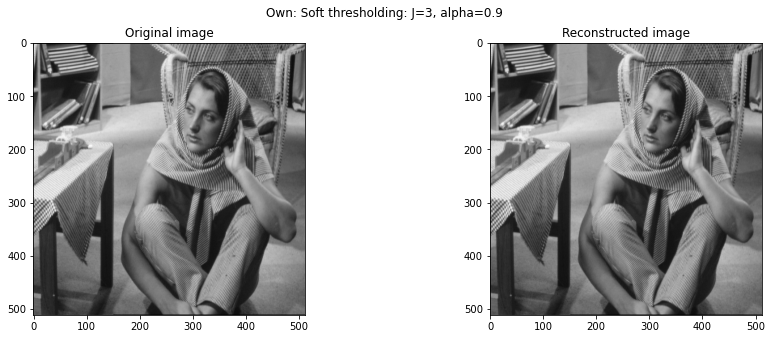

In [12]:
for J in Js:
    for alpha in alphas:
        (cA, Dj, reconstructed) = cvwt.compact_image(x, J=J, alpha=alpha)
        
        fig, axs = plt.subplots(1,2, figsize=(15,5))
        fig.suptitle(f'Own: Soft thresholding: J={J}, alpha={alpha}')
        axs[0].imshow(x, cmap='gray')
        axs[0].set_title('Original image')

        axs[1].imshow(reconstructed, cmap='gray')
        axs[1].set_title('Reconstructed image')

**Compress and convert the image to bytes and save it**

In [13]:
import pickle
import zipfile

(cA, Dj, reconstructed) = cvwt.compact_image(x, J=3, alpha=0.1)

bytes_data = pickle.dumps((cA, Dj))
open('compressed.pkl', 'wb').write(bytes_data)

# compress to gzip to leverage matrix sparcity
with zipfile.ZipFile('compressed_zipped.zip', 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write('compressed.pkl')

<ipython-input-13-0ba7cc7ea490>:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  (cA, Dj, reconstructed) = cvwt.compact_image(x, J=3, alpha=0.1)


**Print the size of the saved files**

In [14]:
import os
print('Size of original JPG image: {:.2f} KB'.format(float(os.path.getsize('cvwt/barbara.jpg'))/1024.))
print('Size of wavelet coefficients: {:.2f} KB'.format(float(os.path.getsize('compressed.pkl'))/1024.))
print('Size of gzip compressed wavelet coefficients: {:.2f} KB'.format(float(os.path.getsize('compressed_zipped.zip'))/1024.))

Size of original JPG image: 99.85 KB
Size of wavelet coefficients: 2048.54 KB
Size of gzip compressed wavelet coefficients: 110.50 KB
